In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from sklearn.preprocessing import StandardScaler

In [6]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def f(W,x,layers):
    a=x
    for l in range(layers-1):
        w = W[l];
        #print(w.shape)
        a = sigmoid(np.matmul(np.transpose(w),a))
    #print('a value before last layer:',a)
    a = sigmoid(W[layers-1,0,0]*a[0]+W[layers-1,1,0]*a[1])
    #print('a value after last layer:',a)
    return a;

def error_func(y,y_hat):
    return y*np.log(y_hat)+(1-y)*np.log(1-y_hat)

def CEO(nj_list,tau,mean,sigma,layers,X,Y,rho):
    complete_weights = np.ones((tau,1,layers,2,2))
    error_vals=[];
    for i in tqdm(range(tau)):
        W = np.ones((nj_list[i],layers,2,2))*0.5
        W[:,-1,:,-1] = 0
        objective_function_list = np.zeros(nj_list[i])
        for j in range(nj_list[i]):
            for l in range(layers):
                w11,w12 = np.random.normal(mean[l][0],sigma[l][0],2)
                w21,w22 = np.random.normal(mean[l][1],sigma[l][0],2)
                W[j][l][0] = np.array([w11,w12])
                W[j][l][1] = np.array([w21,w22])
            W[:,-1,:,-1] = 0
            error = 0
            #print(X,Y)
            for x,y in zip(X,Y):
                a = f(W[j],x,layers)
                error = error + np.abs(error_func(y,a))
            objective_function_list[j] = error
        #print('Objective function list:',objective_function_list)
        #complete_weights[i] = W
        considered_indices = np.argsort(objective_function_list)
        mean_error = np.mean(objective_function_list[considered_indices[:int(rho*nj_list[i])]])
        error_vals.append(mean_error)
        for l in range(layers-1):
            mean[l] = np.mean(np.mean(W[considered_indices[:int(rho*nj_list[i])],l],0),1)#np.mean(W[considered_indices[:int(rho*nj_list[i])],l,0])
        # print(mean.shape)
        mean[-1][0] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[0][0]
        mean[-1][1] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[1][0]
        
    return mean,error_vals
X = np.array([[1,1],[1,2]])
y = np.array([[1],[0]])
list_of_tau = [100,150,190,80,50,150,200,300,80,70]
mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

100%|██████████| 10/10 [00:00<00:00, 80.49it/s]


[1.4005050501130474, 1.3998151958284855, 1.392925000244353, 1.391011675723898, 1.3930367409834878, 1.3821199975450356, 1.379713219376895, 1.377699636924246, 1.375944548419408, 1.3629085976537105]


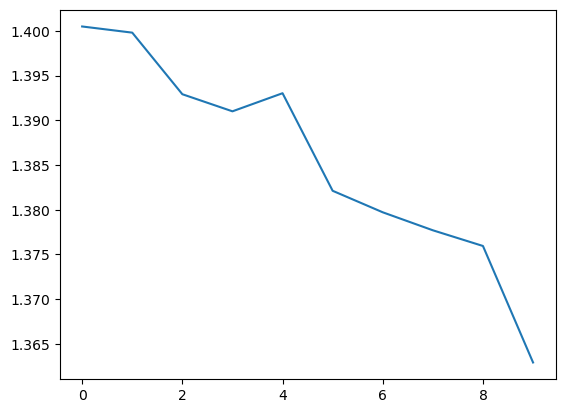

In [7]:
print(error_vals)
from matplotlib import pyplot as plt
plt.plot(error_vals)

# Iris

## Unscaled

100%|██████████| 10/10 [00:03<00:00,  2.93it/s]

[66.43729960931621, 65.94864405350796, 67.18752215049817, 65.22988378347529, 66.85372468234469, 66.83455475016277, 65.72583101189448, 65.50226853218568, 66.20155426094755, 65.50306112973219]


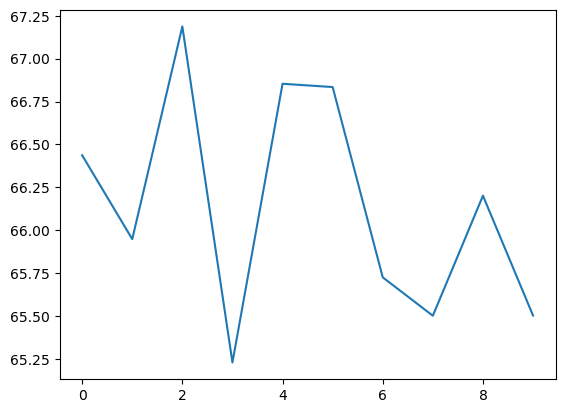

In [11]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X[:99],y[:99],0.3)

print(error_vals)
plt.plot(error_vals)

## Scaled

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

[68.67991148061876, 68.23625340561259, 68.26035615932456, 68.1085826492846, 68.05845130288813, 68.18133894685666, 67.41326193365897, 67.82572611842322, 67.26139726882691, 67.2032094484128]


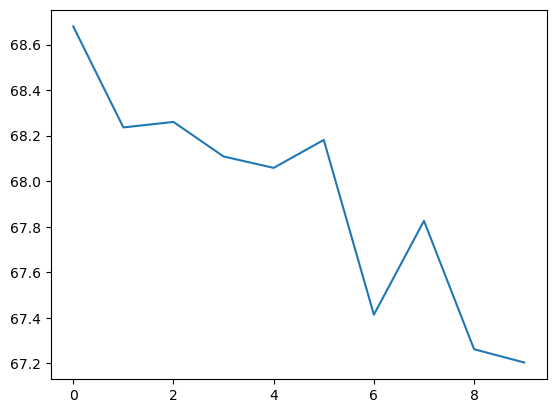

In [12]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X[:99],y[:99],0.3)

print(error_vals)
plt.plot(error_vals)

## Scaled + Tau

100%|██████████| 100/100 [00:32<00:00,  3.08it/s]

[65.9034030943028, 64.15911973091654, 64.41257710745826, 64.25990865624227, 62.52462205093736, 61.35062859804171, 59.401353521930986, 56.47785284063675, 51.74836270925955, 46.61135693115428, 45.33522040083632, 45.09089405824331, 43.6017071197724, 42.39933987086748, 40.80539540231539, 38.81071197910367, 37.81699499550468, 37.133395667093836, 36.694723460090145, 36.299486178562084, 36.03802758150274, 35.874191402874914, 35.712782295158775, 35.60388028065766, 35.518152550179934, 35.442875285496065, 35.415175578412466, 35.35544118851097, 35.28923997542076, 35.24003579450748, 35.189697634926326, 35.14605614971859, 35.12635198540864, 35.087476259375826, 35.04304507517702, 35.01260400602785, 34.9954719466289, 34.966653040293146, 34.9390318955453, 34.91427545145001, 34.87829565933893, 34.868048618620065, 34.85318054653106, 34.83028210430595, 34.81053374274775, 34.7930505063813, 34.779139723268955, 34.77068346581409, 34.76022679879397, 34.752578889690575, 34.73619692676188, 34.72735947472921, 3

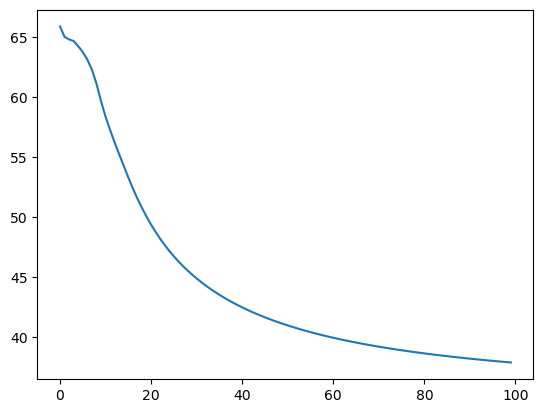

In [34]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

# list_of_tau = [160,180,100,120,1200,80,60,130,180,200,120,140,60,140]
list_of_tau = [random.randint(50,200) for i in range(100)]

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X[:99],y[:99],0.1)

print(error_vals)
plt.plot(np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))

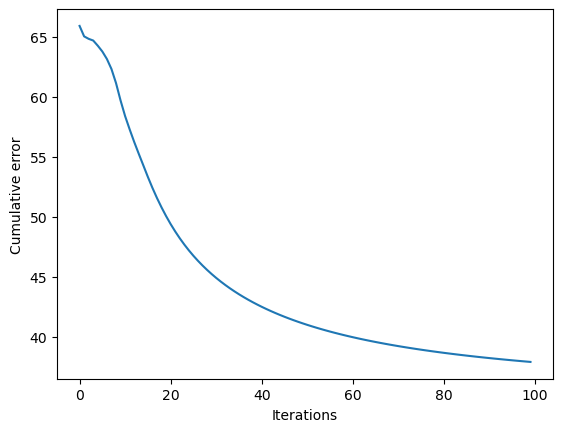

In [35]:
plt.xlabel("Iterations")
plt.ylabel("Cumulative error")
plt.plot(np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))
plt.savefig('IRIS.pdf', format='pdf')

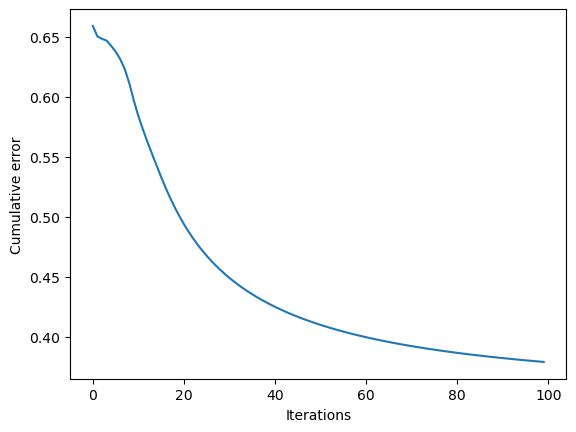

In [38]:
plt.xlabel("Iterations")
plt.ylabel("Cumulative error")
plt.plot((np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))/100)
plt.savefig('IRIS.pdf', format='pdf')

# Pulsar

## Unscaled

  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/wx/m13c2nmx72n4d9ng8bz_kn340000gn/T/ipykernel_7861/3382553690.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))
100%|██████████| 10/10 [06:51<00:00, 41.11s/it]

[7526.008104982678, 4943.917758658291, 3920.5881535808157, 3668.2226560600393, 3588.606427511542, 3581.57076669708, 3518.6011642518224, 3488.654448408998, 3410.8517478906747, 3364.9966417378496]


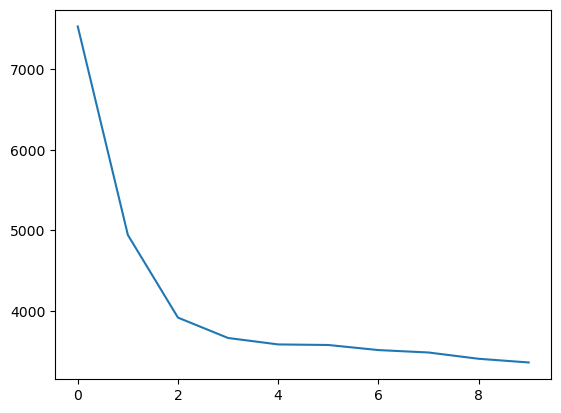

In [70]:
df = pd.read_csv('./pulsar/Pulsar_reduced.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

print(error_vals)
plt.plot(error_vals)

## Scaled + Tau

100%|██████████| 100/100 [1:05:37<00:00, 39.38s/it]


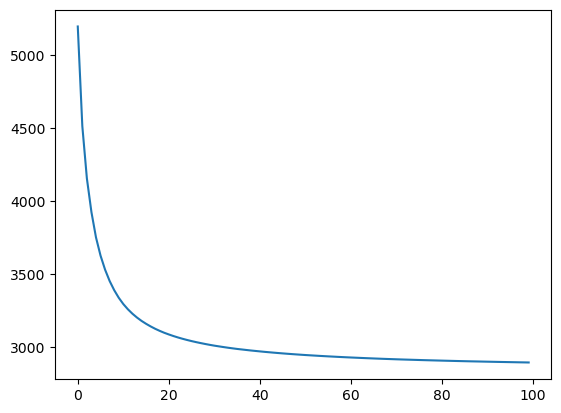

In [30]:
df = pd.read_csv('./pulsar/Pulsar_reduced.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

# list_of_tau = [2000,1800,1600,1400,1200,1000,800,600,400,200]
list_of_tau = [random.randint(50,200) for i in range(100)]

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.1)

# print(error_vals)
plt.plot(np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Cumulative error")
plt.plot(np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))
plt.savefig('PULSAR.pdf', format='pdf')

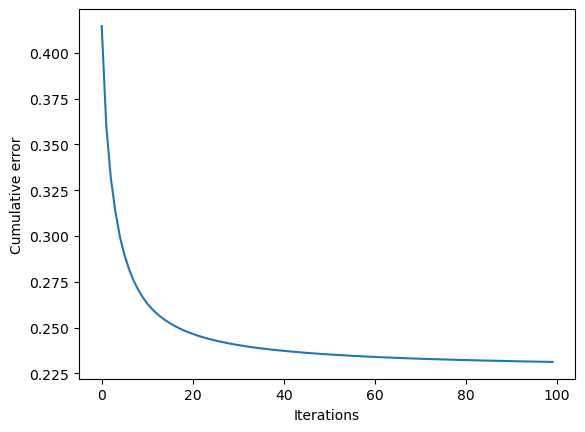

In [33]:
plt.xlabel("Iterations")
plt.ylabel("Cumulative error")
plt.plot((np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))/X.shape[0])
plt.savefig('PULSAR.pdf', format='pdf')